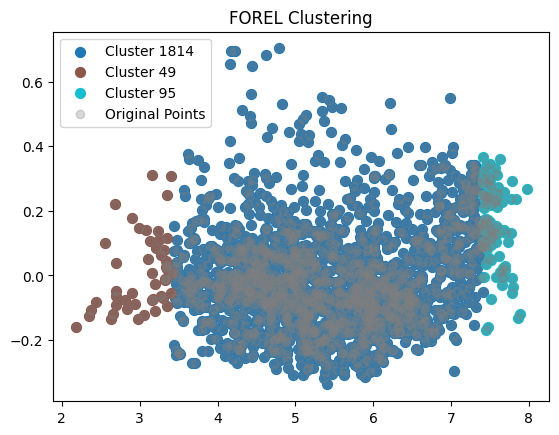

In [21]:
# Завантаження даних

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Алгоритм FOREL

whr = pd.read_csv("whr.csv").dropna()

selected_data = whr[[ 'Happiness score', 'Generosity']]

data = selected_data.values


def forel(data, radius):
    clusters = []
    unvisited_points = data.copy()
    
    while len(unvisited_points) > 0:
        # Вибір початкової точки (випадково)
        center = unvisited_points[np.random.randint(len(unvisited_points))]
        
        while True:
            # Визначення точок у сфері радіуса R
            distances = np.linalg.norm(unvisited_points - center, axis=1)
            cluster_points = unvisited_points[distances <= radius]
            
            # Обчислення нового центра тяжіння
            new_center = cluster_points.mean(axis=0)
            
            # Якщо центр більше не змінюється, виходимо з ітерації
            if np.allclose(center, new_center):
                break
            center = new_center
        
        # Додаємо новий кластер
        clusters.append(cluster_points)
        
        # Видаляємо оброблені точки з невідвіданих
        unvisited_points = unvisited_points[distances > radius]
    
    return clusters


radius = 2
clusters = forel(data, radius)


colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))
for cluster, color in zip(clusters, colors):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], s=50, color=color, label=f"Cluster {len(cluster)}")

plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.3, label="Original Points")
plt.legend()
plt.title("FOREL Clustering")
plt.show()

Кількість кластерів: 18
Кластер 1: {'Afghanistan'}
Кластер 2: {'Azerbaijan', 'Albania', 'Cambodia'}
Кластер 3: {'Benin', 'Algeria', 'Burkina Faso'}
Кластер 4: {'Angola'}
Кластер 5: {'Argentina', 'Belgium'}
Кластер 6: {'Bulgaria', 'Armenia'}
Кластер 7: {'Australia'}
Кластер 8: {'Austria'}
Кластер 9: {'Bahrain'}
Кластер 10: {'Bangladesh', 'Bosnia and Herzegovina'}
Кластер 11: {'Belarus'}
Кластер 12: {'Belize'}
Кластер 13: {'Bhutan'}
Кластер 14: {'Bolivia'}
Кластер 15: {'Botswana'}
Кластер 16: {'Brazil'}
Кластер 17: {'Burundi'}
Кластер 18: {'Cameroon'}


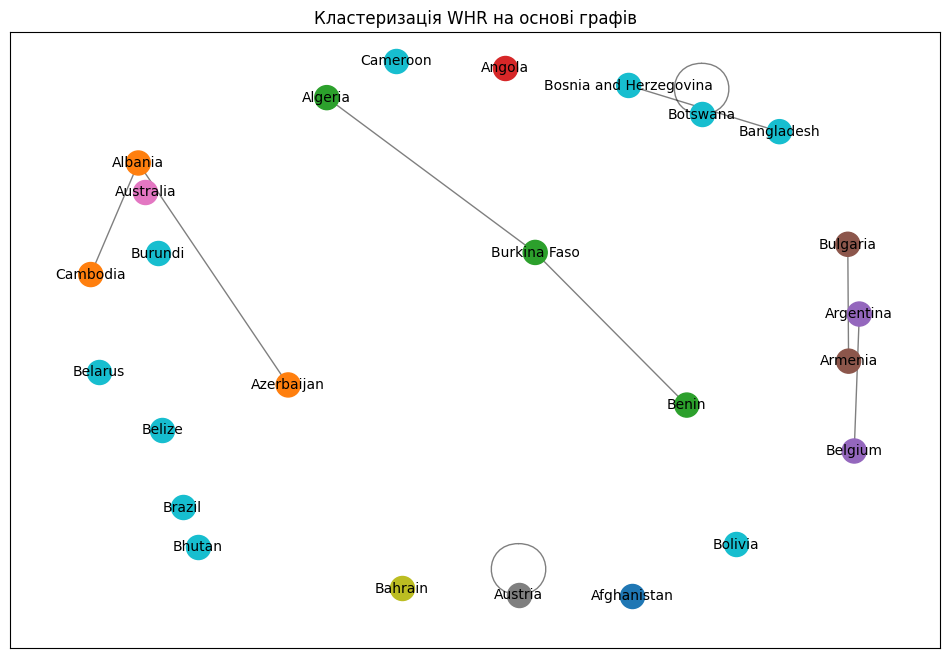

In [52]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Завантаження даних WHR
whr = pd.read_csv("whr.csv").dropna().head(300)

# Вибираємо лише потрібні колонки
data = whr[['Country name', 'Happiness score', 'Generosity']]

# Розрахунок відстаней (евклідові відстані між точками)
distances = euclidean_distances(data[['Happiness score', 'Generosity']])

# Порогова відстань для створення ребра
threshold = 0.01  # Можна налаштувати

# Створення графа
G = nx.Graph()

# Додаємо вузли
for i, row in data.iterrows():
    G.add_node(row['Country name'], score=row['Happiness score'], generosity=row['Generosity'])

# Додаємо ребра для вузлів із близькими значеннями
for i in range(len(distances)):
    for j in range(i + 1, len(distances)):
        if distances[i, j] < threshold:
            G.add_edge(data.iloc[i]['Country name'], data.iloc[j]['Country name'], weight=distances[i, j])

# Використання кластеризації: пошук компонент зв’язності
clusters = list(nx.connected_components(G))

# Вивід результатів
print(f"Кількість кластерів: {len(clusters)}")
for i, cluster in enumerate(clusters):
    print(f"Кластер {i+1}: {cluster}")

# Візуалізація графа
pos = nx.spring_layout(G)  # Розташування вузлів
plt.figure(figsize=(12, 8))

# Відображення вузлів із кольорами для кожного кластера
colors = [plt.cm.tab10(i) for i in range(len(clusters))]
for i, cluster in enumerate(clusters):
    nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=[colors[i]] * len(cluster))

# Відображення ребер
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Відображення міток
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Кластеризація WHR на основі графів")
plt.show()


In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Завантаження даних WHR
whr = pd.read_csv("whr.csv")
whr.dtypes

Country name                         object
Iso alpha                            object
year                                  int64
Happiness score                     float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

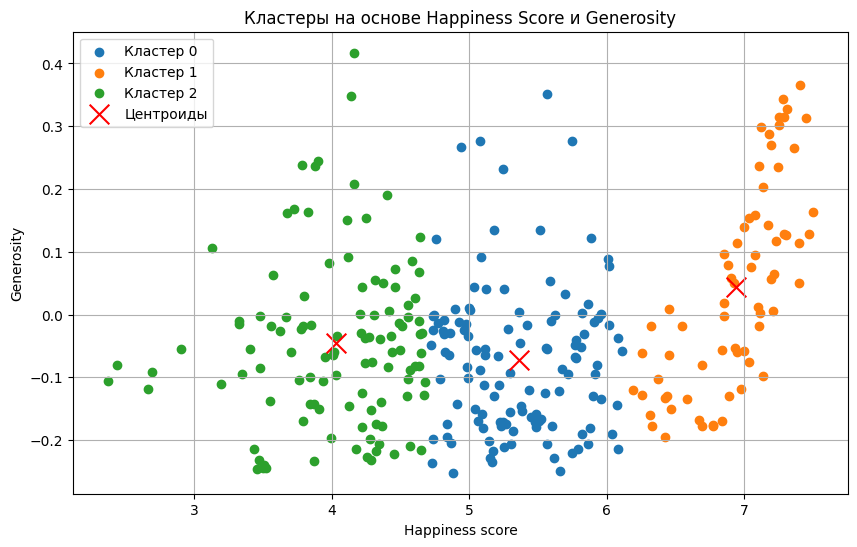

In [4]:
# Импортируем библиотеки
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Загрузка данных (предположим, что файл whr.csv находится в текущей директории)
data = pd.read_csv("whr.csv").dropna().head(300)

# Выберем интересующие признаки для кластеризации (например, 'Happiness Score' и 'Generosity')
selected_features = data[['Happiness score', 'Generosity']]

# Уберем строки с отсутствующими значениями (если они есть)
selected_features = selected_features.dropna()

# Применим алгоритм k-means
k = 3  # Число кластеров
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(selected_features)

# Визуализация кластеров
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Happiness score'], cluster_data['Generosity'], label=f'Кластер {cluster}')
    
# Отобразим центроиды
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Центроиды')

# Настройка графика
plt.xlabel('Happiness score')
plt.ylabel('Generosity')
plt.title('Кластеры на основе Happiness Score и Generosity')
plt.legend()
plt.grid()
plt.show()